# MNIST Handwritten Characters

The handwritten character dataset MNIST is one of the most frequently used toy datasets in computer vision. In contains grayscale images of handwritten characters. In this step, we want to solve it using both dense neural networks and convolutional neural networks as a preparation for ouer own networks.

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from matplotlib import pyplot as plt

# Get the Data
The data is part of tensorflow and can be downloaded as follows. Note that the data order is already randomized and a train test split is already done. We assign our four variables X_train, y_train, X_test and y_test.

In [2]:
mnist = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [10]:
print(len(mnist))
((X_train, y_train), (X_test,y_test)) = mnist
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

2
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


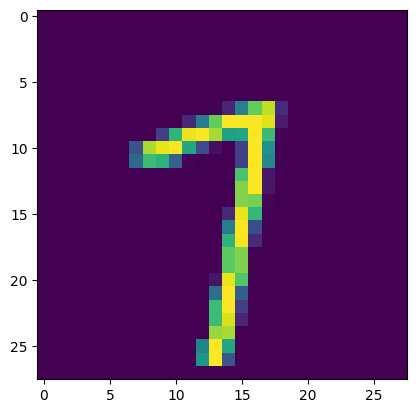

In [12]:
plt.imshow(X_train[42,:])
plt.show()

# A Dense Network

In [28]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model1.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

history = model1.fit(
    X_train,y_train,
    epochs=6
)

Epoch 1/6
1875/1875 [==============================] - 5s 2ms/step - loss: 2.6977 - accuracy: 0.8611
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3822 - accuracy: 0.9074
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2843 - accuracy: 0.9299
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2454 - accuracy: 0.9377
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2217 - accuracy: 0.9445
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2069 - accuracy: 0.9492


In [29]:
loss, acc = model1.evaluate(X_test, y_test)
print("Final Evaluation Loss: %f, Accuracy : %f" %(loss,acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.2526 - accuracy: 0.9429
Final Evaluation Loss: 0.252615, Accuracy : 0.942900


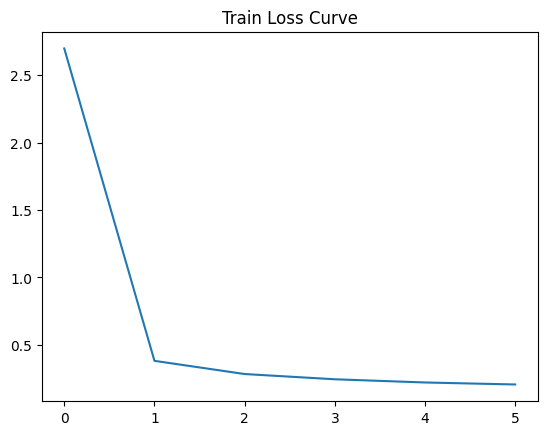

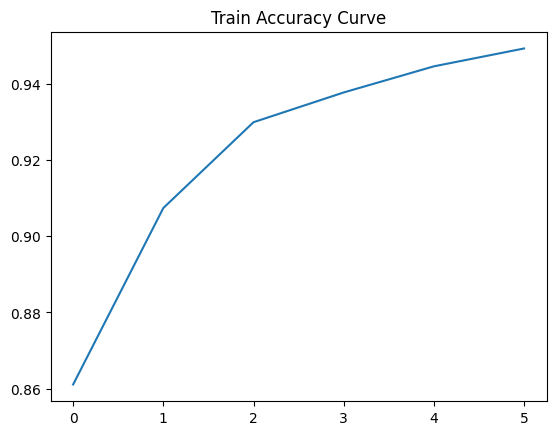

In [30]:
plt.plot(history.epoch, history.history["loss"])
plt.title("Train Loss Curve")
plt.show()

plt.plot(history.epoch, history.history["accuracy"])
plt.title("Train Accuracy Curve")
plt.show()


# A Convolutional Model 
The following model2 is based on CNNs. We try to have the same number of trainable parameters first (though less would be possible easily)

In [46]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ),
  # Dropout(0.25)
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ),
#Dropout
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ),
#Dropout
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(180, activation='relu'),
    tf.keras.layers.Dense(10)
])
#model.add(BatchNormalization())
print(model2.summary())
model2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)
history = model2.fit(
    X_train,y_train,
    epochs=6
)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_47 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 conv2d_49 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                               

In [49]:
loss, acc = model2.evaluate(X_test, y_test)
print("Final Evaluation Loss: %f, Accuracy : %f" %(loss,acc))

313/313 [==============================] - 3s 8ms/step - loss: 0.0412 - accuracy: 0.9890
Final Evaluation Loss: 0.041213, Accuracy : 0.989000


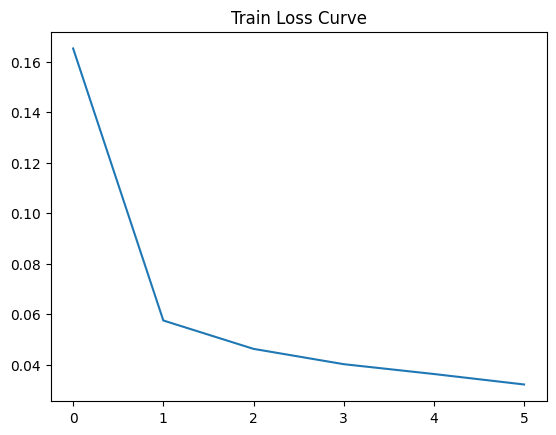

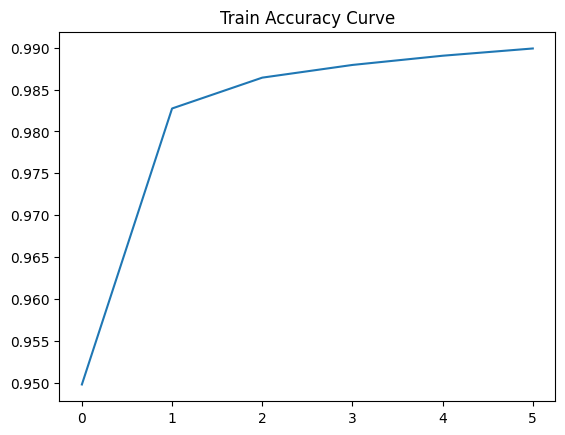

In [50]:
plt.plot(history.epoch, history.history["loss"])
plt.title("Train Loss Curve")
plt.show()

plt.plot(history.epoch, history.history["accuracy"])
plt.title("Train Accuracy Curve")
plt.show()


# Conclusion

A DNN can be trained for MNIST, but has a surprising number of 100,000 weights. With a CNN, the number of weights can be kept much smaller, they are both easier to train and get better final performance. One intuition might be that the convolutions are powerful image analysis tools and by restricting the learning to convolutions, the neural network does not need to understand what an image is (for example, that neighboring pixels are correlated).
